<a href="https://colab.research.google.com/github/Chikuji/analise-python/blob/master/chikuji_PREDICAO_DESAFIOQT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

URI_TREINO = "https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true"
URI_TESTE = "https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv"
URI_DESAFIOQT = "https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv"

dados_treino = pd.read_csv(URI_TREINO)
dados_teste = pd.read_csv(URI_TESTE)
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)

erro_treino = "Erro ao carregar dados de treino"
erro_teste = "Erro ao carregar dados de teste"
erro_desafioqt = "Erro ao carregar dados de submissão"

assert dados_treino.shape == (150000, 5), erro_treino
assert dados_teste.shape == (20000, 5), erro_teste
assert dados_desafioqt.shape == (10000, 5), erro_desafioqt

In [0]:
coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

x_treino = dados_treino[coluna_features].to_numpy()
y_treino = dados_treino[coluna_label].to_numpy()
x_teste = dados_teste[coluna_features].to_numpy()
y_teste = dados_teste[coluna_label].to_numpy()

X_desafioqt  = dados_desafioqt[coluna_features].to_numpy()

In [0]:
from sklearn.svm import LinearSVR
import numpy as np
np.random.seed(2)
#2 semente fixada para iniciar o random sempre no 2
#modelo = LinearSVR(C=1,max_iter=100,fit_intercept=True,intercept_scaling=8.375,epsilon=56.475) MELHOR RESULTADO 2189.7 / dados_treino.query


chikuji = LinearSVR(C=1,max_iter=100,fit_intercept=True,intercept_scaling=8.375,epsilon=56.475) # Mudar os intercept_scaling=8.375,epsilon=56.475 para alinhar a linha da regr. c/ linha y_teste
chikuji.fit(x_treino, y_treino)



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1, dual=True, epsilon=56.475, fit_intercept=True,
          intercept_scaling=8.375, loss='epsilon_insensitive', max_iter=100,
          random_state=None, tol=0.0001, verbose=0)

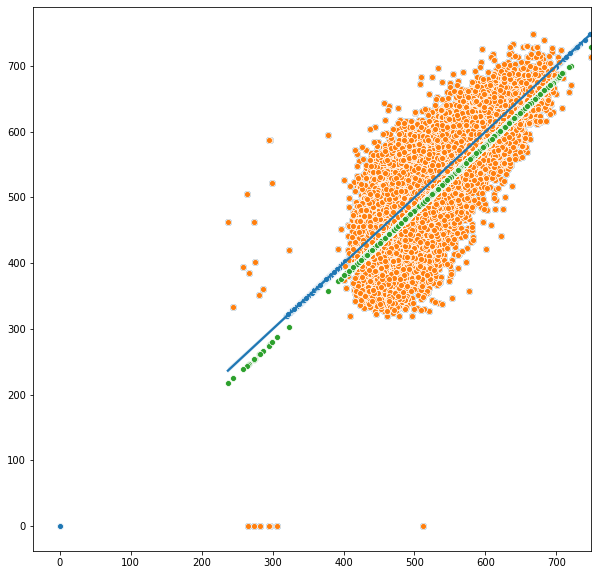

In [0]:
predicoes_notas_linguagem = chikuji.predict(x_teste)


y_predicao = predicoes_notas_linguagem[:15000]
y_comparacao = y_teste[:20000]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste, y=y_teste) # Cria uma linha do y_teste


sns.regplot(x=predicoes_notas_linguagem, y=y_teste) # Cria uma linha de regreção linear da predição

sns.scatterplot(x=predicoes_notas_linguagem, y=y_teste) # Cria a nuvem de pontos

sns.scatterplot(x=predicoes_notas_linguagem, y=predicoes_notas_linguagem-20) # Cria uma linha da predição


In [0]:
# Vamos descobrir qual o ERRO QUADRATICO MEDIO 2189.7643732181814

from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_notas_linguagem)

2189.756927237224

In [0]:
np.round(predicoes_notas_linguagem,2)

array([537.15, 451.16, 646.55, ..., 533.33, 561.6 , 487.24])

In [0]:
y_teste

array([550. , 406.3, 652.3, ..., 548.6, 496. , 448. ])

In [0]:
predicao_desafioqt = chikuji.predict(X_desafioqt)
y_predicao = predicao_desafioqt[:5000]
y_comparacao = y_teste[:10000]

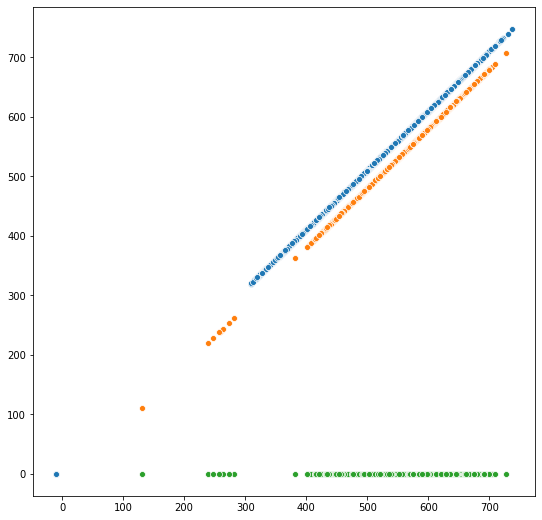

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste-10, y=y_teste) 
sns.scatterplot(x=predicao_desafioqt, y=predicao_desafioqt-20) 
sns.scatterplot(x=predicao_desafioqt, y=0)





In [0]:
desafio_df.describe()

NameError: ignored

In [0]:
predicoes_notas_linguagem.mean()

In [0]:
predicoes_notas_linguagem.std()

In [0]:
predicoes_notas_linguagem.max()

In [0]:
predicoes_notas_linguagem.min()

In [0]:
dados_teste.describe()

In [0]:
#atribuir ao MODELO o nome do seu melhor modelo
from google.colab import files

chikuji = LinearSVR
X_desafioqt = dados_desafioqt[coluna_features].to_numpy()
predicao_desafioqt = modelo.predict(X_desafioqt)


desafio_df = pd.DataFrame(dados_desafioqt.ID)
desafio_df[coluna_label] = np.round(predicao_desafioqt,2)

#NÃO TROCAR O NOME DO ARQUIVO DE SAÍDA (PREDICAO_DESAFIO)
#desafio_df.to_csv('PREDICAO_DESAFIOQT.csv', index=False) 
#files.download('PREDICAO_DESAFIOQT.csv')